In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/kddcup.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
0     int64
1     object
2     object
3     object
4     int64
5     int64
6     int64
7     int64
8     int64
9     int64
10    int64
11    int64
12    int64
13    int64
14    int64
15    int64
16    int64
17    int64
18    int64
19    int64
20    int64
21    int64
22    int64
23    int64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    int64
32    int64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    object
dtypes: float64(15), int64(23), object(4)
memory usage: 1.5+ GB


In [4]:
columns = [f.split(":")[0] for f in """
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
""".split("\n") if len(f)>0]

columns.append("Category")
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Category']


In [5]:
df.columns = columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898431 entries, 0 to 4898430
Data columns (total 42 columns):
duration                       int64
protocol_type                  object
service                        object
flag                           object
src_bytes                      int64
dst_bytes                      int64
land                           int64
wrong_fragment                 int64
urgent                         int64
hot                            int64
num_failed_logins              int64
logged_in                      int64
num_compromised                int64
root_shell                     int64
su_attempted                   int64
num_root                       int64
num_file_creations             int64
num_shells                     int64
num_access_files               int64
num_outbound_cmds              int64
is_host_login                  int64
is_guest_login                 int64
count                          int64
srv_count                      in

In [7]:
df.Category.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: Category, dtype: int64

In [8]:
y = np.where(df.Category == "normal.", 1, 0)
X = df.select_dtypes(include=[np.float64, np.int64]).values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1234)
X_train.shape, X_test.shape

((3428901, 38), (1469530, 38))

In [9]:
%%time

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDClassifier(alpha=0.01
                                       , learning_rate="invscaling"
                                       , loss="log"
                                       , eta0 = 0.001
                                       , max_iter=1000
                                       , tol=1e-4
                                       , penalty= "l2"
                                       , random_state=1))
])

pipe.fit(X_train, y_train)
print("training: ", pipe.score(X_train, y_train),
"\ntesting: ", pipe.score(X_test, y_test))

training:  0.9954588948470662 
testing:  0.995442080120855
CPU times: user 2min 19s, sys: 8.86 s, total: 2min 28s
Wall time: 2min 30s


In [10]:
pd.Series(y).value_counts()/len(y)

0    0.80141
1    0.19859
dtype: float64

In [11]:
X.shape

(4898431, 38)

In [12]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [13]:
pca = decomposition.PCA(random_state=1)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

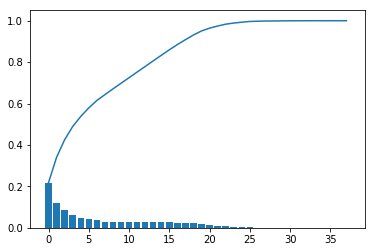

In [14]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))


In [15]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.217992
1     0.340139
2     0.425184
3     0.488883
4     0.537578
5     0.578892
6     0.614678
7     0.643028
8     0.670624
9     0.697762
10    0.724820
11    0.751861
12    0.778883
13    0.805902
14    0.832847
15    0.859288
16    0.884769
17    0.908234
18    0.930924
19    0.950612
20    0.964015
21    0.974265
22    0.983265
23    0.988660
24    0.992790
25    0.996454
26    0.997649
27    0.998359
28    0.998793
29    0.999199
30    0.999591
31    0.999773
32    0.999893
33    0.999932
34    0.999967
35    0.999991
36    1.000000
37    1.000000
dtype: float64

In [16]:
pca = decomposition.PCA(random_state=1, n_components=24)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [17]:
X_train_pca.shape

(3428901, 24)

In [ ]:
%%time

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDClassifier(alpha=0.001
                                       , n_jobs=2
                                       , learning_rate="invscaling"
                                       , loss="log"
                                       , eta0 = 0.2
                                       , max_iter=1000
                                       , tol=1e-4 
                                       , penalty= "l2"
                                       , random_state=1))
])

pipe.fit(X_train_pca, y_train)
print("training: ", pipe.score(X_train_pca, y_train),
"\ntesting: ", pipe.score(X_test_pca, y_test))

In [22]:
%%time

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("pca", decomposition.PCA(random_state=1, n_components=24)),
    ("est", linear_model.SGDClassifier(alpha=0.01
                                       , learning_rate="invscaling"
                                       , loss="log"
                                       , eta0 = 0.001
                                       , max_iter=1000
                                       , tol=1e-4
                                       , penalty= "l2"
                                       , random_state=1))
])

pipe.fit(X_train, y_train)
print("training: ", pipe.score(X_train, y_train),
"\ntesting: ", pipe.score(X_test, y_test))

KeyboardInterrupt: 